Nodes in the subgraph: [1, 2, 3, 4, 5]
Edges in the subgraph: [(1, 5)]


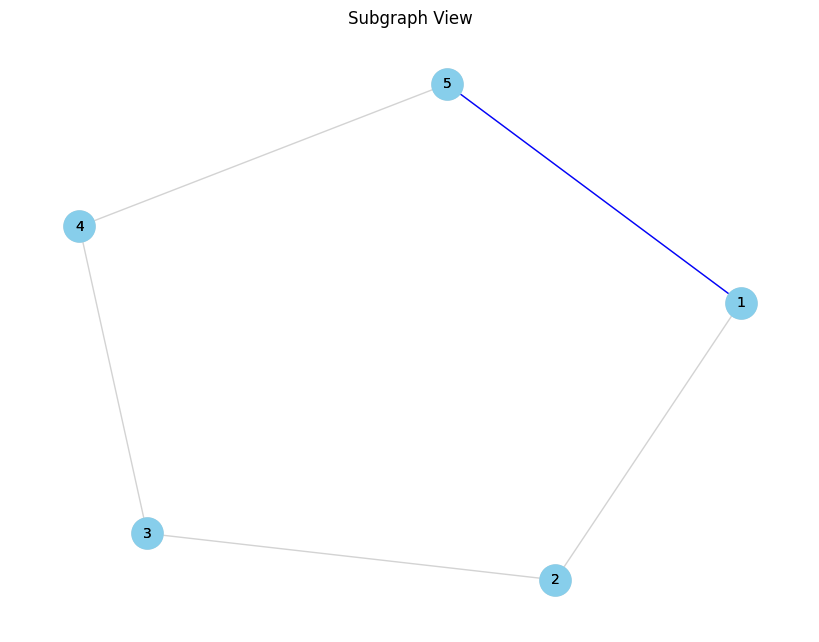

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (1, 5)])

# Define a filtering function
filter_edge = lambda u, v: u % 2 == 1 and v % 2 == 1

# Create a subgraph view
subgraph = nx.graphviews.subgraph_view(G, filter_edge=filter_edge)

# Display nodes and edges of the subgraph view
print("Nodes in the subgraph:", subgraph.nodes)
print("Edges in the subgraph:", subgraph.edges)

# Visualize the subgraph
pos = nx.spring_layout(G)  # Compute positions for visualization
plt.figure(figsize=(8, 6))

# Draw the original graph in light gray
nx.draw(G, pos, with_labels=True, node_color="lightgray", edge_color="lightgray", node_size=500, font_size=10)

# Highlight the subgraph
nx.draw(subgraph, pos, with_labels=True, node_color="skyblue", edge_color="blue", node_size=500, font_size=10)

plt.title("Subgraph View")
plt.show()


Members of nodes after Condesation :
0 ===> {8, 2, 6}
1 ===> {5}
2 ===> {7}
3 ===> {1}
9


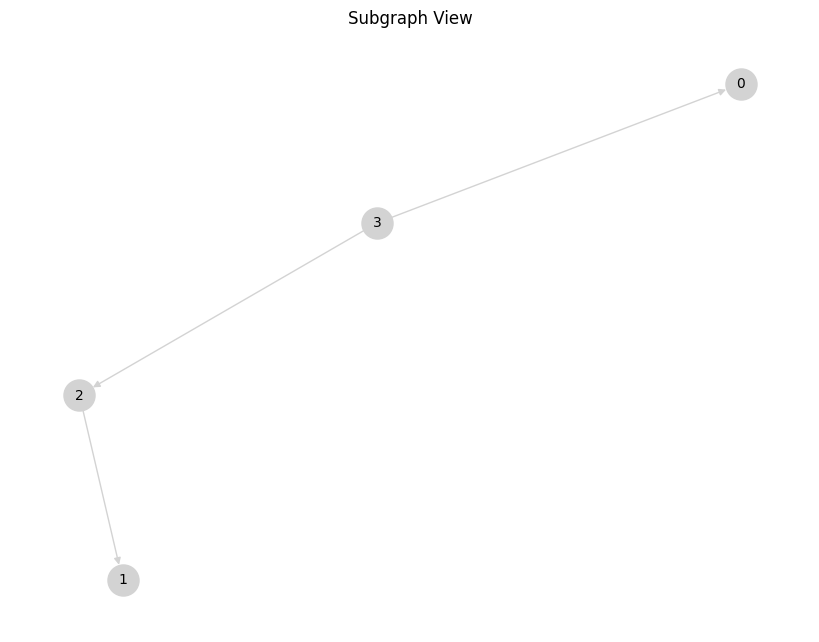

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import  cast

def contract_edge(graph: nx.DiGraph, edge):
    u, v = edge
    contracted = nx.contracted_edge(graph, edge, self_loops=False)
    return nx.relabel_nodes(contracted, {u: u + v}, copy=False)
# Create a graph
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6), (8, 2), (6, 8)])
#############################
G = contract_edge(G, (3,4))
# condense strongly connected componenets into singles nodes 
G = cast(nx.DiGraph, nx.condensation(G))
###########################################
print("Members of nodes after Condesation :")
for node in G :
    print(f"{node} ===> {G.nodes[node]['members']}")
######################
res = sum([(0,2),(1,4),(2,8),(3,9)], ())
print(max(res))
# (0, 2, 1, 4, 2, 8, 3, 9)
##################################
pos = nx.spring_layout(G)  # Compute positions for visualization
plt.figure(figsize=(8, 6))
# Draw the original graph in light gray
nx.draw(G, pos, with_labels=True, node_color="lightgray", edge_color="lightgray", node_size=500, font_size=10)

plt.title("Subgraph View")
plt.show()


In [2]:
from coyote.disjoint_set import DisjointSet
def display_columns(columns: DisjointSet[T]):
    print("Disjoint Set Contents:")
    # Use the all_classes generator to get all equivalence classes
    for equivalence_class in columns.all_classes():
        print(f"Equivalence Class: {equivalence_class}")

# Usage:
columns = DisjointSet[int]()  # Example instantiation for integers
columns.add(1)
columns.add(2)
columns.add(3)
columns.add(4)

columns.union(1, 2)
columns.union(3, 4)

# Display the contents of the disjoint set
display_columns(columns)


ModuleNotFoundError: No module named 'coyote'

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import  cast

G = nx.Graph()
G.add_edges_from([(1, 3), (4, 3),(2,3),(5,6)])
G[1][3]['weight']=3
G[2][3]['weight']=3
G[4][3]['weight']=3
matching = nx.algorithms.max_weight_matching(G, maxcardinality=True)
print(matching)

{(2, 3), (5, 6)}


In [19]:
from collections import defaultdict
from typing import Any, Counter, List, Optional, Set, Dict, Tuple, Generator, cast, TypeVar

spans: Dict[int, Set[int]] = defaultdict(set)
spans[0]=(2,3,5)
spans[1]=(4,8,9)
print(f"===> obtained spans : {spans}")
# summing the lengths of the sets in spans.values()
cost = sum(map(len, spans.values()))
print(cost)

===> obtained spans : defaultdict(<class 'set'>, {0: (2, 3, 5), 1: (4, 8, 9)})
6
